In [1]:
import pickle as pkl
import numpy as np
from absl import flags,app

In [2]:
FLAGS = flags.FLAGS
flags.DEFINE_string('data_path', '', 'Path to the data. Required.')
flags.DEFINE_string('data_file', '', 'Name of the file containing the data. Must be \
                   a pickle file. Required.')
flags.DEFINE_string('model_file', '', 'File containing inverse class model. Required.')
flags.DEFINE_string('ind_model_file', '', 'File containing the ind model. Required.')
flags.DEFINE_string('save_file', 'invResult.pkl', 'File name to save results to. Saves to data_path.')
flags.DEFINE_float('budget_start',1,'Starting budget for inverse classification. Default: 1')
flags.DEFINE_float('budget_end',10, 'Ending budget for inverse classification. Set budget_end =\
                     budget_start if only one budget value is desired. Default: 10')
flags.DEFINE_float('budget_interval',1,'Amount by which to increase the budget values from budget_start\
                   to budget_end. Default: 1')
flags.DEFINE_integer('max_iters', 50, 'Maximum number of gradient descent iterations. Default: 100')
flags.DEFINE_float('grad_tol', .0001, 'Gradient descent stopping criteria (\epsilon). Default: .0001')
flags.DEFINE_float('lam', 10, 'Initial gradient multiplier. Default: 10')
flags.DEFINE_integer('input_width', 6, 'Number of time steps of the input window. Default: 6')
flags.DEFINE_integer('label_width', 6, 'Number of time steps of the label window. Default: 6')
flags.DEFINE_integer('shift', 1, 'Time offset between input window and label window. Default: 1')
_ = FLAGS(["__main__"])

In [3]:
from invclass.inv_utils import save_result

In [4]:
with open(r'brazil_data/brazil_result.pkl','rb') as file:
    result_dict = pkl.load(file)

In [5]:
with open(r'brazil_data/processed_brazil.pkl','rb') as file:
    data_dict = pkl.load(file)

In [6]:
input_width = 6
label_width = 6
shift = 1

In [7]:
xI_ind = data_dict['xI_ind']
xD_ind = data_dict['xD_ind']

In [8]:
return_xI = np.zeros([len(result_dict['budgets']), data_dict['test']['X'].shape[0], len(xI_ind)])
return_xD = np.zeros([len(result_dict['budgets']), data_dict['test']['X'].shape[0], len(xD_ind)])

In [9]:
n = list(range(len(result_dict['ids'])))
n.reverse()

for i in n:
    j = result_dict['ids'][i]
    return_xI[:, i:i+input_width] = result_dict[j]['xI']
    return_xD[:, i:i+input_width] = result_dict[j]['xD']

KeyError: 'ids'

In [ ]:
return_dict = {'budgets':result_dict['budgets'],
               'xI':return_xI,
               'xD':return_xD}

In [ ]:
save_result(return_dict)

In [ ]:
import matplotlib.pyplot as plt

In [10]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
xI_obs = data_dict['test']['X'][:,xI_ind]
xD_obs = data_dict['test']['X'][:,xD_ind]

In [20]:
xI_est = result_dict['xI'][0]
xD_est = result_dict['xD'][0]

In [41]:
xI_diff = np.sum(np.absolute(xI_obs - xI_est), axis=1) / xI_obs.shape[1]
xD_diff = xD_obs - xD_est

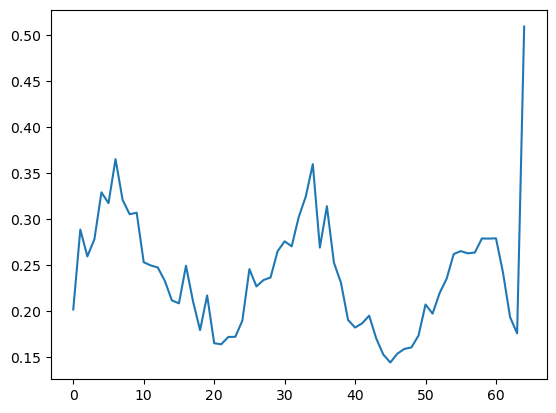

In [45]:
plt.plot(xI_diff)
_ = plt.show

In [46]:
budgets = result_dict['budgets']

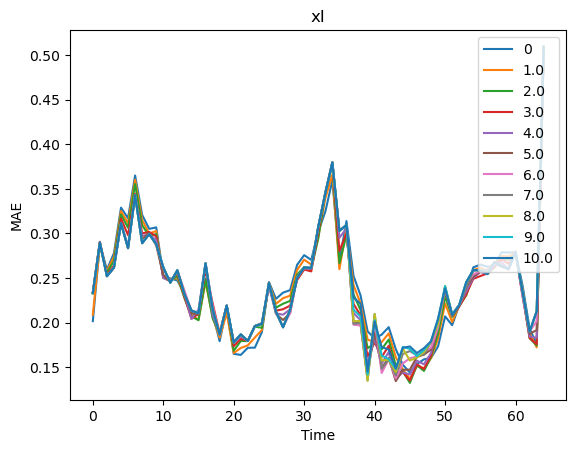

In [66]:
for i, b in enumerate(budgets):
    xI_est = result_dict['xI'][i]
    xI_diff = np.sum(np.absolute(xI_obs - xI_est), axis=1) / xI_obs.shape[1]
    plt.plot(xI_diff, label=b)

plt.legend()
plt.title('xI')
plt.xlabel('Time')
plt.ylabel('MAE')
_ = plt.show()

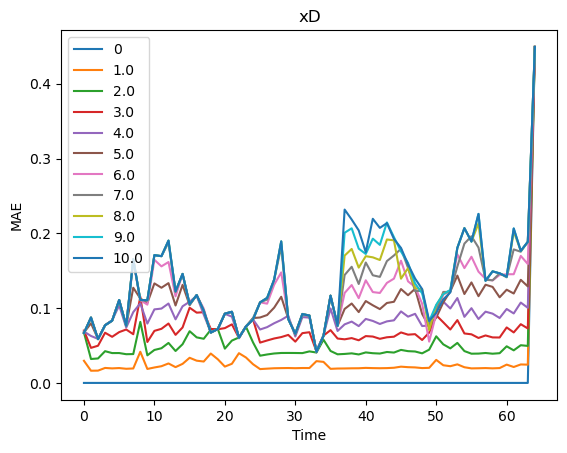

In [65]:
for i, b in enumerate(budgets):
    xD_est = result_dict['xD'][i]
    xD_diff = np.sum(np.absolute(xD_obs - xD_est), axis=1) / xD_obs.shape[1]
    plt.plot(xD_diff, label=b)

plt.legend()
plt.title('xD')
plt.xlabel('Time')
plt.ylabel('MAE')
_ = plt.show()